In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate

# Send a GET request to the webpage
url = "https://en.wikipedia.org/wiki/List_of_FIA_member_organisations"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")
pd.set_option('display.max_rows', None)


# Extract the list of car racing federations
federations = []
paragraphs = soup.find_all("p")  # Find all <p> tags
for p in paragraphs:
    if "car racing federation" in p.text.lower():  # Adjust the condition as needed
        federations.append(p.text.strip())

lists = soup.find_all("ul")  # Find all <ul> tags
for ul in lists:
    for li in ul.find_all("li"):
        federations.append(li.text.strip())

# Put data in a DataFrame
df = pd.DataFrame({"List of country who conduct car racing at local-level having sports club": federations})

# Remove unnecessary rows which are not required
df = df.iloc[48:-30]

# Display the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='pipe', showindex=False))


| List of country who conduct car racing at local-level having sports club                      |
|:----------------------------------------------------------------------------------------------|
| Mechanical Sports Federation of Algeria (FASM) – Sport and Mobility                           |
| Touring Club of Algeria (TCA) – Mobility                                                      |
| Botswana Motor Sports – Sport                                                                 |
| Emergency Assist 991 – Mobility                                                               |
| Automobile Club of Burundi (CAB) – Sport and Mobility                                         |
| Automobile Federation of the Democratic Republic of Congo (FEDACO) – Sport and Mobility       |
| Automobile and Touring Club of Egypt (ATCE) – Sport and Mobility                              |
| Ministry of Tourism of the Arab Republic of Egypt – Mobility                                  |
| National Federatio

In [2]:
import requests
from PyPDF2 import PdfReader
# data extracted from the source which was pdf
def extract_text_from_pdf_pages(pdf_url, start_page, end_page):
    # then Download the PDF file from the URL
    response = requests.get(pdf_url)
    with open("temp_pdf.pdf", "wb") as pdf_file:
        pdf_file.write(response.content)
    
    # Read the downloaded PDF file and extract text from the specified pages
    page_texts = []
    with open("temp_pdf.pdf", "rb") as file:
        pdf_reader = PdfReader(file)
        for page_num in range(start_page - 1, end_page):
            page = pdf_reader.pages[page_num]
            page_text = page.extract_text()
            page_texts.append(page_text)
    
    return page_texts


pdf_url = "https://www.fia.com/sites/default/files/brochure_sport_grant_programme_a4_v8_web.pdf"
start_page = 12
end_page = 15
page_texts = extract_text_from_pdf_pages(pdf_url, start_page, end_page)

# Print the extracted text from each page
for i, text in enumerate(page_texts, start=start_page):
    print(f"Page {i}:\n{text}\n")


Page 12:
2020 FUNDING 
STATISTICS
2020 FUNDING BY REGION
€ 200K
€ 400K€ 600K€ 800K
€ 1MAmericas € 466,220 (15.4%)
Asia Paciﬁc € 600,426 (19.8%)
Europe € 877,256  (29.0%)
MENA € 706,160  (23.4%)
Sub-Saharan Africa  € 375,623  (12.4%)
€ 3.0M  
AWARDED
12

Page 13:
2020 FUNDING BY PILLAR DIVISION
€ 500K€ 2MSafety € 515,903 (17.0%)
ASN Structure & Management € 77'983 (2.6%)
Motor Sport Development € 2,244,969 (74.2%)
Social Responsibility € 186'830 (6.2%)€ 1M€ 1.5M 72 
PROJECTS
13

Page 14:
2021 FUNDING 
STATISTICS
2021 FUNDING BY REGION
€ 200K
€ 400K€ 600K€ 800K€ 1M € 1.2M
€ 1.4M€ 1.8M€ 1.4M
€ 1.6MAmericas € 933,493 (16.6%)
Asia Paciﬁc € 846,304 (15.0%)
Europe € 1,807,964 (32.1%)
MENA € 1,126,642 (20.0%)
Sub-Saharan Africa  € 915,488 (16.3%)
€5,6M  
AWARDED
14

Page 15:
2021 FUNDING BY PILLAR DIVISION
Safety € 745,747 (13.2%)
ASN Structure & Management € 509,677 (9.1%)
Motor Sport Development € 3,662,014 (65.0%)
Social Responsibility € 712,453 (12.7%)€ 500K€ 2M
€ 2.5M
€ 3M€ 1M€ 1.5M 136 


In [3]:
import re

data = """
Americas € 466,220 (15.4%)
Asia Paciﬁc € 600,426 (19.8%)
Europe € 877,256  (29.0%)
MENA € 706,160  (23.4%)
Sub-Saharan Africa  € 375,623  (12.4%)
"""

# Define regular expression patterns to extract data
pattern = r'(\w+(\s\w+)*)(?:\s+€\s+(\d+(?:,\d+)*))\s+\((\d+\.\d+)%\)'

# Extract data using regular expressions
matches = re.findall(pattern, data)

# Create lists to store extracted data
regions = []
funding_amounts = []
percentages = []

# Iterate over matches and extract data
for match in matches:
    region = match[0].strip()
    funding_amount = int(match[2].replace(',', ''))
    percentage = float(match[3])
    regions.append(region)
    funding_amounts.append(funding_amount)
    percentages.append(percentage)

# Create DataFrame
df = pd.DataFrame({
    'Region': regions,
    'Funding Amount (€)': funding_amounts,
    'Percentage (%)': percentages
})
from tabulate import tabulate

# Define the heading
heading = "Funding by Region in 2020 by FIA"

# Convert DataFrame to a table
table1 = tabulate(df, headers='keys', tablefmt='pretty')

# Print the heading
print(heading)

# Print the table
print(table1)







Funding by Region in 2020 by FIA
+---+----------------+--------------------+----------------+
|   |     Region     | Funding Amount (€) | Percentage (%) |
+---+----------------+--------------------+----------------+
| 0 |    Americas    |       466220       |      15.4      |
| 1 |  Asia Paciﬁc   |       600426       |      19.8      |
| 2 |     Europe     |       877256       |      29.0      |
| 3 |      MENA      |       706160       |      23.4      |
| 4 | Saharan Africa |       375623       |      12.4      |
+---+----------------+--------------------+----------------+


In [4]:
import pandas as pd

# Data
data = """
Safety € 515,903 (17.0%)
ASN Structure & Management € 77'983 (2.6%)
Motor Sport Development € 2,244,969 (74.2%)
Social Responsibility € 186'830 (6.2%)
"""

# Split each line based on "€" and extract category, funding amount, and percentage
lines = [line.strip().split("€") for line in data.strip().split("\n")]
categories = [line[0].strip() for line in lines]
funding_and_percentage = [line[1].strip() for line in lines]
funding_amounts = [int(item.split()[0].replace("'", "").replace(",", "")) for item in funding_and_percentage]
percentages = [float(item.split()[1][1:-2]) for item in funding_and_percentage]

# Create DataFrame
df1 = pd.DataFrame({
    'Category': categories,
    'Funding Amount (€)': funding_amounts,
    'Percentage (%)': percentages
})

from tabulate import tabulate

# Define the heading
heading = "2020 FUNDING BY PILLAR DIVISION"

# Convert DataFrame to a table
table2 = tabulate(df1, headers='keys', tablefmt='pretty')

# Print the heading
print(heading)

# Print the table
print(table2)


2020 FUNDING BY PILLAR DIVISION
+---+----------------------------+--------------------+----------------+
|   |          Category          | Funding Amount (€) | Percentage (%) |
+---+----------------------------+--------------------+----------------+
| 0 |           Safety           |       515903       |      17.0      |
| 1 | ASN Structure & Management |       77983        |      2.6       |
| 2 |  Motor Sport Development   |      2244969       |      74.2      |
| 3 |   Social Responsibility    |       186830       |      6.2       |
+---+----------------------------+--------------------+----------------+


In [5]:
import pandas as pd

# Provided data
data = """
Americas € 933,493 (16.6%)
Asia Paciﬁc € 846,304 (15.0%)
Europe € 1,807,964 (32.1%)
MENA € 1,126,642 (20.0%)
Sub-Saharan Africa  € 915,488 (16.3%)
"""

# Split each line based on "€" and extract region, funding amount, and percentage
lines = [line.strip().split("€") for line in data.strip().split("\n")]
regions = [line[0].strip() for line in lines]
funding_and_percentage = [line[1].strip() for line in lines]
funding_amounts = [int(item.split()[0].replace(",", "")) for item in funding_and_percentage]
percentages = [float(item.split()[1][1:-2]) for item in funding_and_percentage]

# Create DataFrame
df2 = pd.DataFrame({
    'Region': regions,
    'Funding Amount (€)': funding_amounts,
    'Percentage (%)': percentages
})
from tabulate import tabulate

# Define the heading
heading = "2021 FUNDING BY FIC to the region"

# Convert DataFrame to a table
table3 = tabulate(df2, headers='keys', tablefmt='pretty')

# Print the heading
print(heading)

# Print the table
print(table3)


2021 FUNDING BY FIC to the region
+---+--------------------+--------------------+----------------+
|   |       Region       | Funding Amount (€) | Percentage (%) |
+---+--------------------+--------------------+----------------+
| 0 |      Americas      |       933493       |      16.6      |
| 1 |    Asia Paciﬁc     |       846304       |      15.0      |
| 2 |       Europe       |      1807964       |      32.1      |
| 3 |        MENA        |      1126642       |      20.0      |
| 4 | Sub-Saharan Africa |       915488       |      16.3      |
+---+--------------------+--------------------+----------------+


In [6]:
import pandas as pd

# Provided data
data = """
Safety € 745,747 (13.2%)
ASN Structure & Management € 509,677 (9.1%)
Motor Sport Development € 3,662,014 (65.0%)
Social Responsibility € 712,453 (12.7%)
"""

# Split each line based on "€" and extract division, funding amount, and percentage
lines = [line.strip().split("€") for line in data.strip().split("\n")]
divisions = [line[0].strip() for line in lines]
funding_and_percentage = [line[1].strip() for line in lines]
funding_amounts = [int(item.split()[0].replace(",", "")) for item in funding_and_percentage]
percentages = [float(item.split()[1][1:-2]) for item in funding_and_percentage]

# Create DataFrame
df3 = pd.DataFrame({
    'Division': divisions,
    'Funding Amount (€)': funding_amounts,
    'Percentage (%)': percentages
})
from tabulate import tabulate

# Define the heading
heading = "2021 FUNDING BY PILLAR DIVISION"

# Convert DataFrame to a table
table4 = tabulate(df3, headers='keys', tablefmt='pretty')

# Print the heading
print(heading)

# Print the table
print(table4)

2021 FUNDING BY PILLAR DIVISION
+---+----------------------------+--------------------+----------------+
|   |          Division          | Funding Amount (€) | Percentage (%) |
+---+----------------------------+--------------------+----------------+
| 0 |           Safety           |       745747       |      13.2      |
| 1 | ASN Structure & Management |       509677       |      9.1       |
| 2 |  Motor Sport Development   |      3662014       |      65.0      |
| 3 |   Social Responsibility    |       712453       |      12.7      |
+---+----------------------------+--------------------+----------------+


In [7]:
pip install fpdf


Note: you may need to restart the kernel to use updated packages.


C:\Users\Tester\AppData\Local\Temp\ipykernel_14040\2820360361.py:9: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


FUnding based on the Region
+----------------+---------------------------+-----------------------+---------------------------+-----------------------+
| Region         |   Funding Amount (€)_2020 |   Percentage (%)_2020 |   Funding Amount (€)_2021 |   Percentage (%)_2021 |
+================+===========================+=======================+===========================+=======================+
| Americas       |                    466220 |                  15.4 |                    933493 |                  16.6 |
+----------------+---------------------------+-----------------------+---------------------------+-----------------------+
| Asia Paciﬁc    |                    600426 |                  19.8 |                    846304 |                  15   |
+----------------+---------------------------+-----------------------+---------------------------+-----------------------+
| Europe         |                    877256 |                  29   |                   1807964 |             

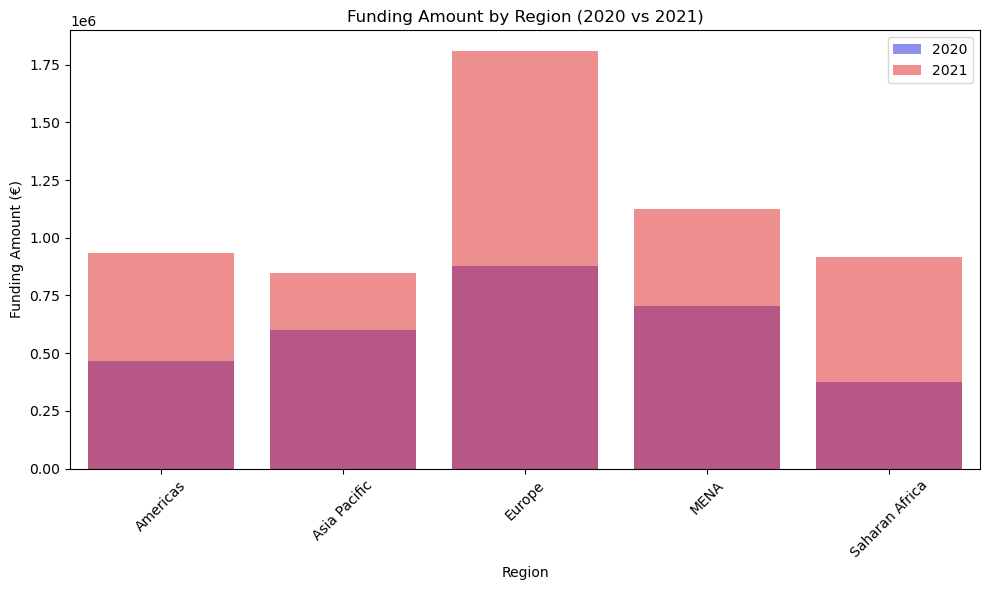

C:\Users\Tester\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tester\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


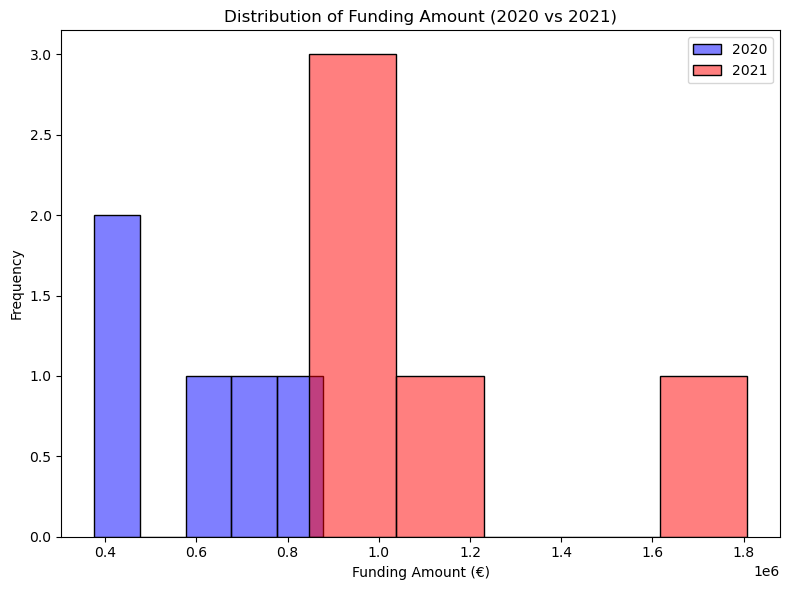

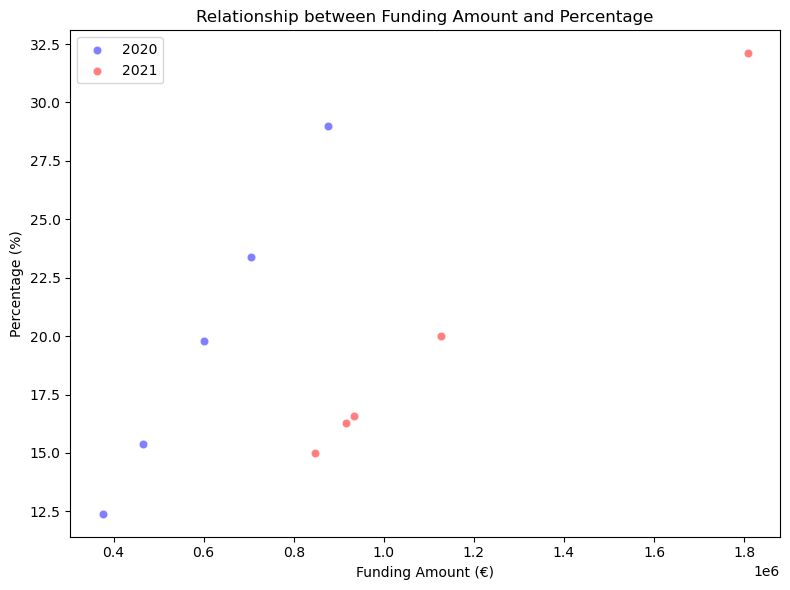

In [3]:
import pandas as pd
import numpy as np  # Import NumPy for handling NaN values
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from tabulate import tabulate

# Set use_inf_as_na option explicitly
pd.set_option('mode.use_inf_as_na', True)

import pandas as pd

# Set pandas display options
pd.set_option('display.max_columns', None)  # Set maximum number of columns to display
pd.set_option('display.width', None)         # Disable column wrapping

# Define the data for funding by FIC in 2021
data_2021 = {
    'Region': ['Americas', 'Asia Paciﬁc', 'Europe', 'MENA', 'Sub-Saharan Africa'],
    'Funding Amount (€)_2021': [933493, 846304, 1807964, 1126642, 915488],
    'Percentage (%)_2021': [16.6, 15.0, 32.1, 20.0, 16.3]
}

# Define the data for funding by FIA in 2020
data_2020 = {
    'Region': ['Americas', 'Asia Paciﬁc', 'Europe', 'MENA', 'Saharan Africa'],
    'Funding Amount (€)_2020': [466220, 600426, 877256, 706160, 375623],
    'Percentage (%)_2020': [15.4, 19.8, 29.0, 23.4, 12.4]
}

# Convert data to DataFrames
df_2021 = pd.DataFrame(data_2021)
df_2020 = pd.DataFrame(data_2020)

# Merge the two tables based on the 'Region' column
combined_df = pd.concat([df_2020, df_2021.iloc[:, 1:]], axis=1)
print("FUnding based on the Region")
tabular_data = tabulate(combined_df, headers='keys', tablefmt='grid', showindex=False)

# Print the combined table
print(tabular_data )
mean_funding_2020 = combined_df['Funding Amount (€)_2020'].mean()
mean_funding_2021 = combined_df['Funding Amount (€)_2021'].mean()
mean_percentage_2020 = combined_df['Percentage (%)_2020'].mean()
mean_percentage_2021 = combined_df['Percentage (%)_2021'].mean()

median_funding_2020 = combined_df['Funding Amount (€)_2020'].median()
median_funding_2021 = combined_df['Funding Amount (€)_2021'].median()
median_percentage_2020 = combined_df['Percentage (%)_2020'].median()
median_percentage_2021 = combined_df['Percentage (%)_2021'].median()

mode_funding_2020 = combined_df['Funding Amount (€)_2020'].mode()[0]
mode_funding_2021 = combined_df['Funding Amount (€)_2021'].mode()[0]
mode_percentage_2020 = combined_df['Percentage (%)_2020'].mode()[0]
mode_percentage_2021 = combined_df['Percentage (%)_2021'].mode()[0]

# Calculate correlation coefficient between funding amounts and percentages for 2020 and 2021
correlation_2020 = combined_df[['Funding Amount (€)_2020', 'Percentage (%)_2020']].corr().iloc[0, 1]
correlation_2021 = combined_df[['Funding Amount (€)_2021', 'Percentage (%)_2021']].corr().iloc[0, 1]

# Print the analysis results
print("Analysis Results:")
print("------------------")
print("Mean Funding Amount (€) 2020:", mean_funding_2020)
print("Mean Funding Amount (€) 2021:", mean_funding_2021)
print("Mean Percentage (%) 2020:", mean_percentage_2020)
print("Mean Percentage (%) 2021:", mean_percentage_2021)
print()
print("Median Funding Amount (€) 2020:", median_funding_2020)
print("Median Funding Amount (€) 2021:", median_funding_2021)
print("Median Percentage (%) 2020:", median_percentage_2020)
print("Median Percentage (%) 2021:", median_percentage_2021)
print()
print("Mode Funding Amount (€) 2020:", mode_funding_2020)
print("Mode Funding Amount (€) 2021:", mode_funding_2021)
print("Mode Percentage (%) 2020:", mode_percentage_2020)
print("Mode Percentage (%) 2021:", mode_percentage_2021)
print()
print("Correlation Coefficient (Funding Amount vs. Percentage) 2020:", correlation_2020)
print("Correlation Coefficient (Funding Amount vs. Percentage) 2021:", correlation_2021)







# Visualizations
# Bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Region', y='Funding Amount (€)_2020', color='blue', alpha=0.5, label='2020')
sns.barplot(data=combined_df, x='Region', y='Funding Amount (€)_2021', color='red', alpha=0.5, label='2021')
plt.title('Funding Amount by Region (2020 vs 2021)')
plt.xlabel('Region')
plt.ylabel('Funding Amount (€)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bar_plot_funding based on region 2020 and 2021.jpg")  # Save as JPG
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x='Funding Amount (€)_2020', bins=5, color='blue', alpha=0.5, label='2020')
sns.histplot(data=combined_df, x='Funding Amount (€)_2021', bins=5, color='red', alpha=0.5, label='2021')
plt.title('Distribution of Funding Amount (2020 vs 2021)')
plt.xlabel('Funding Amount (€)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig("histogram_plot_funding based on region 2020 and 2021.jpg")  # Save as JPG
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Funding Amount (€)_2020', y='Percentage (%)_2020', color='blue', alpha=0.5, label='2020')
sns.scatterplot(data=combined_df, x='Funding Amount (€)_2021', y='Percentage (%)_2021', color='red', alpha=0.5, label='2021')
plt.title('Relationship between Funding Amount and Percentage')
plt.xlabel('Funding Amount (€)')
plt.ylabel('Percentage (%)')
plt.legend()
plt.tight_layout()
plt.savefig("scatter_plot_funding based on region 2020 and 2021.jpg")  # Save as JPG
plt.show()



In [9]:
import os
print(os.getcwd())


C:\Users\Tester


Funding Based on other factors Which are pillar for sports car Racing
+----------------------------+---------------------------+-----------------------+---------------------------+-----------------------+
| Category                   |   Funding Amount (€)_2020 |   Percentage (%)_2020 |   Funding Amount (€)_2021 |   Percentage (%)_2021 |
+============================+===========================+=======================+===========================+=======================+
| Safety                     |                    515903 |                  17   |                    745747 |                  13.2 |
+----------------------------+---------------------------+-----------------------+---------------------------+-----------------------+
| ASN Structure & Management |                     77983 |                   2.6 |                    509677 |                   9.1 |
+----------------------------+---------------------------+-----------------------+---------------------------+----------

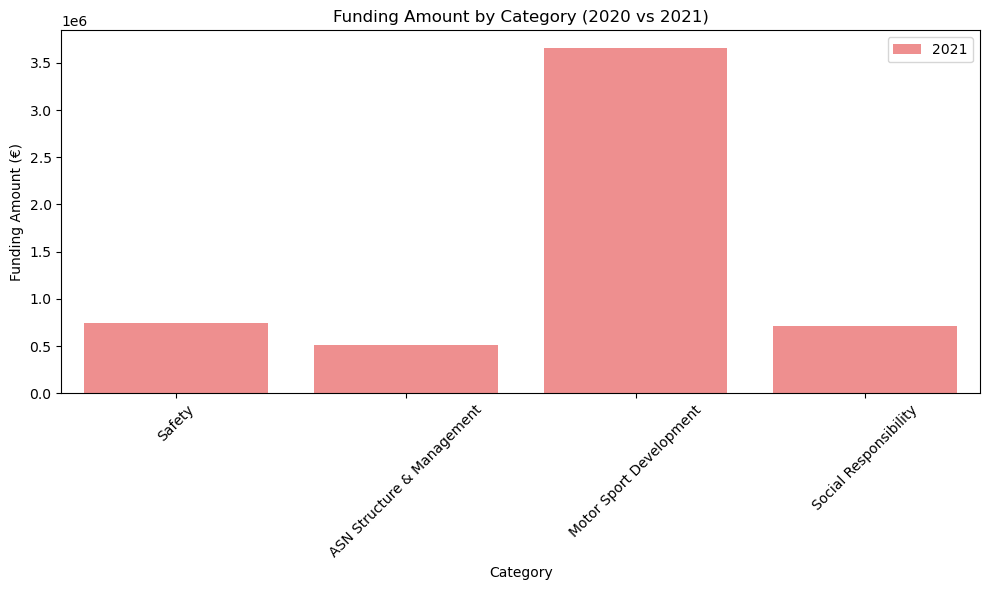

C:\Users\Tester\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tester\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


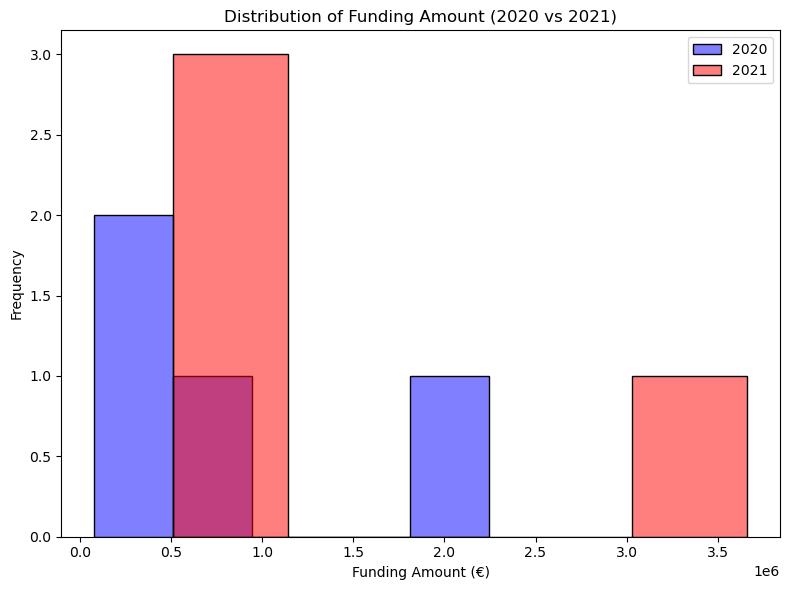

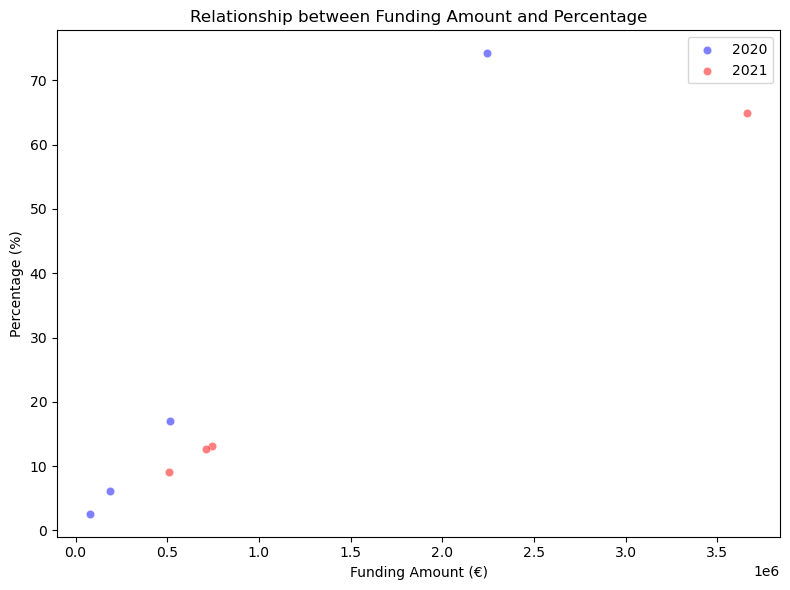

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from tabulate import tabulate

# Define the data for both tables
data_2020 = {
    'Category': ['Safety', 'ASN Structure & Management', 'Motor Sport Development', 'Social Responsibility'],
    'Funding Amount (€)_2020': [515903, 77983, 2244969, 186830],
    'Percentage (%)_2020': [17.0, 2.6, 74.2, 6.2]
}

data_2021 = {
    'Division': ['Safety', 'ASN Structure & Management', 'Motor Sport Development', 'Social Responsibility'],
    'Funding Amount (€)_2021': [745747, 509677, 3662014, 712453],
    'Percentage (%)_2021': [13.2, 9.1, 65.0, 12.7]
}

# Convert data to DataFrames
df_2020_based_on_pillarDivision = pd.DataFrame(data_2020)
df_2021_based_on_pillarDivision = pd.DataFrame(data_2021)

# Convert data to DataFrames
df_2021_based_on_pillarDivision = pd.DataFrame(data_2021)
df_2020_based_on_pillarDivision= pd.DataFrame(data_2020)

# Merge the two tables based on the 'pillar' column
combined_df = pd.concat([df_2020_based_on_pillarDivision,df_2021_based_on_pillarDivision .iloc[:, 1:]], axis=1)
tabular_data = tabulate(combined_df, headers='keys', tablefmt='grid', showindex=False)
print("Funding Based on other factors Which are pillar for sports car Racing")

# Print the combined table
print(tabular_data )
mean_funding_2020 = combined_df['Funding Amount (€)_2020'].mean()
mean_funding_2021 = combined_df['Funding Amount (€)_2021'].mean()
mean_percentage_2020 = combined_df['Percentage (%)_2020'].mean()
mean_percentage_2021 = combined_df['Percentage (%)_2021'].mean()

median_funding_2020 = combined_df['Funding Amount (€)_2020'].median()
median_funding_2021 = combined_df['Funding Amount (€)_2021'].median()
median_percentage_2020 = combined_df['Percentage (%)_2020'].median()
median_percentage_2021 = combined_df['Percentage (%)_2021'].median()

mode_funding_2020 = combined_df['Funding Amount (€)_2020'].mode()[0]
mode_funding_2021 = combined_df['Funding Amount (€)_2021'].mode()[0]
mode_percentage_2020 = combined_df['Percentage (%)_2020'].mode()[0]
mode_percentage_2021 = combined_df['Percentage (%)_2021'].mode()[0]

# Calculate correlation coefficient between funding amounts and percentages for 2020 and 2021
correlation_2020_Based_on_pillar_Division = combined_df[['Funding Amount (€)_2020', 'Percentage (%)_2020']].corr().iloc[0, 1]
correlation_2021_Based_on_pillar_Division = combined_df[['Funding Amount (€)_2021', 'Percentage (%)_2021']].corr().iloc[0, 1]

# Print the analysis results
print("Analysis Results:")
print("------------------")
print("Mean Funding Amount (€) 2020:", mean_funding_2020)
print("Mean Funding Amount (€) 2021:", mean_funding_2021)
print("Mean Percentage (%) 2020:", mean_percentage_2020)
print("Mean Percentage (%) 2021:", mean_percentage_2021)
print()
print("Median Funding Amount (€) 2020:", median_funding_2020)
print("Median Funding Amount (€) 2021:", median_funding_2021)
print("Median Percentage (%) 2020:", median_percentage_2020)
print("Median Percentage (%) 2021:", median_percentage_2021)
print()
print("Mode Funding Amount (€) 2020:", mode_funding_2020)
print("Mode Funding Amount (€) 2021:", mode_funding_2021)
print("Mode Percentage (%) 2020:", mode_percentage_2020)
print("Mode Percentage (%) 2021:", mode_percentage_2021)
print()
print("Correlation Coefficient (Funding Amount vs. Percentage) 2020:", correlation_2020)
print("Correlation Coefficient (Funding Amount vs. Percentage) 2021:", correlation_2021)





# Visualizations
# Bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Category', y='Funding Amount (€)_2021', color='red', alpha=0.5, label='2021')
plt.title('Funding Amount by Category (2020 vs 2021)')
plt.xlabel('Category')
plt.ylabel('Funding Amount (€)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('FundingBasedOnCategory_bar.jpg')  # Save as JPG
plt.savefig('FundingBasedOnCategory_bar.pdf')  # Save as PDF
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x='Funding Amount (€)_2020', bins=5, color='blue', alpha=0.5, label='2020')
sns.histplot(data=combined_df, x='Funding Amount (€)_2021', bins=5, color='red', alpha=0.5, label='2021')
plt.title('Distribution of Funding Amount (2020 vs 2021)')
plt.xlabel('Funding Amount (€)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('FundingBasedOnCategory_histogram.jpg')  # Save as JPG
plt.savefig('FundingBasedOnCategory_histogram.pdf')  # Save as PDF
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Funding Amount (€)_2020', y='Percentage (%)_2020', color='blue', alpha=0.5, label='2020')
sns.scatterplot(data=combined_df, x='Funding Amount (€)_2021', y='Percentage (%)_2021', color='red', alpha=0.5, label='2021')
plt.title('Relationship between Funding Amount and Percentage')
plt.xlabel('Funding Amount (€)')
plt.ylabel('Percentage (%)')
plt.legend()
plt.tight_layout()
plt.savefig('FundingBasedOnCategory_scatter.jpg')  # Save as JPG
plt.savefig('FundingBasedOnCategory_scatter.pdf')  # Save as PDF
plt.show()




In [8]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

# Start a Selenium WebDriver
driver = webdriver.Chrome()  # Or choose another browser driver

# Load the web page
url = 'https://www.motorsport.com/f1/results/2024/japanese-gp-639931/'
driver.get(url)

# Wait for the page to fully load (adjust the timeout as needed)
driver.implicitly_wait(10)  # 10 seconds

# Extract the HTML content after the page has loaded
html = driver.page_source

# Use BeautifulSoup to parse the HTML
soup = BeautifulSoup(html, 'html.parser')

# Find and extract the table data
table = soup.find('table')
# Now, extract data from the table as needed

# Close the WebDriver
driver.quit()
print(table)


In [17]:
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate

# Assuming 'html_content' contains the HTML content of the table
html_content = """
<table class="ms-table ms-table--result" data-active-group-desktop="main-information" data-active-group-mobile="main-information">
<thead style="transform: translate3d(0px, 0px, 0px);">
<tr class="ms-table_row ms-result-table-grouping-header">
<th class="ms-result-table-grouping-header__cell" colspan="100">
<div class="ms-result-table-grouping-header__select-wrapper ms-native-select__wrapper" data-group="desktop" data-mapping='{"driver-info-1-of-2":"","additional-data-1-of-2":"main-information","main-information":"main-information","additional-data-2-of-2":"main-information","driver-info-2-of-2":"additional-data-1-of-2"}'>
<select class="ms-result-table-grouping-header__select text-body font-bold uppercase ms-native-select__select">
<option value="main-information">Main Information</option>
<option value="additional-data-1-of-2">Additional Data</option>
</select>
<div class="ms-native-select__controls">
<div class="ms-native-select__arrow" data-dir="prev">
<svg class="ms-native-select__arrow-icon" fill="none" height="24" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none" stroke="none"></path>
<path d="M9 6l6 6l-6 6"></path>
</svg>
</div>
<div class="ms-native-select__count">
<div class="ms-native-select__count--current">1</div>
             - 
            <div class="ms-native-select__count--total">2</div>
</div>
<div class="ms-native-select__arrow" data-dir="next">
<svg class="ms-native-select__arrow-icon" fill="none" height="24" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none" stroke="none"></path>
<path d="M9 6l6 6l-6 6"></path>
</svg>
</div>
</div>
</div> </th>
</tr>
<tr class="ms-table_row">
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--pos">Cla</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--result_driver_id">Driver</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--number" data-group-mobile="driver-info-1-of-2"> # </th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2"></th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">Laps</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">Time</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">Interval</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">km/h</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">Pits</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">Points</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">Retirement</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">Chassis</th>
<th class="ms-table_cell ms-table_cell--header text-md font-bold ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">Engine</th>
</tr>
</thead>
<tbody>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">1</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/max-verstappen/17529/">
<img alt="Netherlands" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/nl-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">M. Verstappen</span>
</span>
<span class="team">Red Bull Racing</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">1</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/red-bull-racing/4/">
<img alt="Red Bull Racing-Honda RBPT RB20" loading="lazy" src="https://cdn-8.motorsport.com/images/vcl/86AX5qYb/s3/red-bull-racing-honda-rbpt-rb2-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            1:54'23.566                        </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
</span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">161.271</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">26</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Red Bull</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Red Bull</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">2</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/sergio-perez/9328/">
<img alt="Mexico" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/mx-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">S. Perez</span>
</span>
<span class="team">Red Bull Racing</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">11</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/red-bull-racing/4/">
<img alt="Red Bull Racing-Honda RBPT RB20" loading="lazy" src="https://cdn-2.motorsport.com/images/vcl/86AX5qYb/s3/red-bull-racing-honda-rbpt-rb2-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +12.535                        </p>
<p>
                                1:54'36.101                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        12.535                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.977</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">18</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Red Bull</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Red Bull</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/carlos-sainz/15916/">
<img alt="Spain" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/es-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">C. Sainz</span>
</span>
<span class="team">Ferrari</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">55</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/ferrari/3/">
<img alt="Ferrari" loading="lazy" src="https://cdn-6.motorsport.com/images/vcl/B2G3eV29/s3/ferrari-sf-24-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +20.866                        </p>
<p>
                                1:54'44.432                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        8.331                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.782</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">15</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">4</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/charles-leclerc/109611/">
<img alt="Monaco" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/mc-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">C. Leclerc</span>
</span>
<span class="team">Ferrari</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">16</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/ferrari/3/">
<img alt="Ferrari" loading="lazy" src="https://cdn-6.motorsport.com/images/vcl/B2G3eV29/s3/ferrari-sf-24-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +26.522                        </p>
<p>
                                1:54'50.088                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        5.656                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.650</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">2</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">12</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">5</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/lando-norris/289316/">
<img alt="United Kingdom" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/gb-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">L. Norris</span>
</span>
<span class="team">McLaren</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">4</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/mclaren/10/">
<img alt="McLaren-Mercedes" loading="lazy" src="https://cdn-0.motorsport.com/images/vcl/qYKlrX6Z/s3/mclaren-mercedes-mcl38-12.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +29.700                        </p>
<p>
                                1:54'53.266                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        3.178                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.576</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">10</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">McLaren</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">6</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/fernando-alonso/489/">
<img alt="Spain" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/es-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">F. Alonso</span>
</span>
<span class="team">Aston Martin Racing</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">14</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/aston-martin-racing/97/">
<img alt="Aston Martin AMR24" loading="lazy" src="https://cdn-3.motorsport.com/images/vcl/z0qrww2N/s3/aston-martin-aramco-mercedes-a-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +44.272                        </p>
<p>
                                1:55'07.838                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        14.572                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.237</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">8</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Aston Martin</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">7</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/george-russell/21167/">
<img alt="United Kingdom" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/gb-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">G. Russell</span>
</span>
<span class="team">Mercedes</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">63</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/mercedes/5/">
<img alt="Mercedes W15" loading="lazy" src="https://cdn-1.motorsport.com/images/vcl/OYvDJv0V/s3/mercedes-f1-w15-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +45.951                        </p>
<p>
                                1:55'09.517                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        1.679                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.198</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">6</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">8</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/oscar-piastri/828689/">
<img alt="Australia" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/au-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">O. Piastri</span>
</span>
<span class="team">McLaren</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">81</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/mclaren/10/">
<img alt="McLaren-Mercedes" loading="lazy" src="https://cdn-7.motorsport.com/images/vcl/qYKlrX6Z/s3/mclaren-mercedes-mcl38-12.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +47.525                        </p>
<p>
                                1:55'11.091                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        1.574                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.162</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">4</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">McLaren</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">9</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/lewis-hamilton/1278/">
<img alt="United Kingdom" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/gb-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">L. Hamilton</span>
</span>
<span class="team">Mercedes</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">44</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/mercedes/5/">
<img alt="Mercedes W15" loading="lazy" src="https://cdn-5.motorsport.com/images/vcl/OYvDJv0V/s3/mercedes-f1-w15-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">53</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +48.626                        </p>
<p>
                                1:55'12.192                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        1.101                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">160.136</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">2</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">10</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/yuki-tsunoda/828523/">
<img alt="Japan" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/jp-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">Y. Tsunoda</span>
</span>
<span class="team">RB</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">22</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/toro-rosso/12/">
<img alt="RB-Honda RBPT" loading="lazy" src="https://cdn-1.motorsport.com/images/vcl/G0owmo0k/s3/rb-honda-rbpt-2.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:54'25.168                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        1 Lap                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">158.188</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value">1</span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">RB</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Red Bull</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">11</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/nico-hulkenberg/9327/">
<img alt="Germany" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/de-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">N. Hulkenberg</span>
</span>
<span class="team">Haas F1 Team</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">27</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/haas-f1-team/471/">
<img alt="Haas-Ferrari VF-24" loading="lazy" src="https://cdn-7.motorsport.com/images/vcl/G2ewVm6o/s3/haas-ferrari-vf-24-2.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:54'30.734                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        5.566                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">158.060</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Haas</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">12</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/lance-stroll/20950/">
<img alt="Canada" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/ca-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">L. Stroll</span>
</span>
<span class="team">Aston Martin Racing</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">18</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/aston-martin-racing/97/">
<img alt="Aston Martin AMR24" loading="lazy" src="https://cdn-9.motorsport.com/images/vcl/z0qrww2N/s3/aston-martin-aramco-mercedes-a-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:54'34.799                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        4.065                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">157.966</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">4</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Aston Martin</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">13</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/kevin-magnussen/15905/">
<img alt="Denmark" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/dk-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">K. Magnussen</span>
</span>
<span class="team">Haas F1 Team</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">20</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/haas-f1-team/471/">
<img alt="Haas-Ferrari VF-24" loading="lazy" src="https://cdn-0.motorsport.com/images/vcl/G2ewVm6o/s3/haas-ferrari-vf-24-2.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:54'41.485                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        6.686                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">157.813</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">2</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Haas</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">14</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/valtteri-bottas/13082/">
<img alt="Finland" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/fi-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">V. Bottas</span>
</span>
<span class="team">Sauber</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">77</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/sauber/9/">
<img alt="Kick Sauber-Ferrari C44" loading="lazy" src="https://cdn-3.motorsport.com/images/vcl/X0kv1l6d/s3/kick-sauber-ferrari-c44.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:54'42.459                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        0.974                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">157.791</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Sauber</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">15</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/esteban-ocon/19624/">
<img alt="France" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/fr-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">E. Ocon</span>
</span>
<span class="team">Alpine</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">31</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/alpine/24858/">
<img alt="Alpine A524" loading="lazy" src="https://cdn-0.motorsport.com/images/vcl/p2wygp6Q/s3/alpine-renault-a524-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:55'04.718                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        22.259                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">157.282</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Alpine</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Renault</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">16</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/pierre-gasly/19626/">
<img alt="France" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/fr-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">P. Gasly</span>
</span>
<span class="team">Alpine</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">10</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/alpine/24858/">
<img alt="Alpine A524" loading="lazy" src="https://cdn-7.motorsport.com/images/vcl/p2wygp6Q/s3/alpine-renault-a524-4.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:55'18.632                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        13.914                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">156.966</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Alpine</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Renault</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">17</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/logan-sargeant/289607/">
<img alt="United States" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/us-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">L. Sargeant</span>
</span>
<span class="team">Williams</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">2</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/williams/13/">
<img alt="Williams FW46" loading="lazy" src="https://cdn-1.motorsport.com/images/vcl/56lw1NYN/s3/williams-mercedes-fw46-7.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">52</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +1 Lap                        </p>
<p>
                                1:55'36.331                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        17.699                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">156.565</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">4</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Williams</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">dnf</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/zhou-guanyu/289725/">
<img alt="China" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/cn-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">Z. Guanyu</span>
</span>
<span class="team">Sauber</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">24</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/sauber/9/">
<img alt="Kick Sauber-Ferrari C44" loading="lazy" src="https://cdn-8.motorsport.com/images/vcl/X0kv1l6d/s3/kick-sauber-ferrari-c44.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">12</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
                            +41 Laps                        </p>
<p>
                                49'29.022                            </p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
                        40 Laps                    </span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">84.129</span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">4</span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">Gearbox</span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Sauber</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Ferrari</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">dnf</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/daniel-ricciardo/9378/">
<img alt="Australia" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/au-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">D. Ricciardo</span>
</span>
<span class="team">RB</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">3</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/toro-rosso/12/">
<img alt="RB-Honda RBPT" loading="lazy" src="https://cdn-4.motorsport.com/images/vcl/G0owmo0k/s3/rb-honda-rbpt-2.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">0</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
</p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
</span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">Collision</span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">RB</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Red Bull</span>
</td>
</tr>
<tr class="ms-table_row">
<td class="ms-table_cell ms-table_field--pos">
<span class="ms-table_row-value">dnf</span>
</td>
<td class="ms-table_cell ms-table_field--result_driver_id">
<a class="ms-link info-wrapper" href="/driver/alex-albon/109625/">
<img alt="Thailand" height="12" loading="lazy" src="//cdn-1.motorsport.com/static/img/cf/th-2.svg" width="20"/> <span class="info">
<span class="name">
<span class="name-short">A. Albon</span>
</span>
<span class="team">Williams</span>
</span>
</a>
</td>
<td class="ms-table_cell ms-table_field--number" data-group-mobile="driver-info-1-of-2">
<span class="ms-table_row-value">23</span>
</td>
<td class="ms-table_cell ms-table_field--car_logo" data-group-desktop="main-information" data-group-mobile="driver-info-1-of-2">
<a href="/team/williams/13/">
<img alt="Williams FW46" loading="lazy" src="https://cdn-0.motorsport.com/images/vcl/56lw1NYN/s3/williams-mercedes-fw46-7.png"/>
</a>
</td>
<td class="ms-table_cell ms-table_field--laps" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">0</span>
</td>
<td class="ms-table_cell ms-table_field--time" data-group-desktop="main-information" data-group-mobile="main-information">
<div class="ms-table_row-value">
<p>
</p>
</div></td>
<td class="ms-table_cell ms-table_field--interval" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value">
</span>
</td>
<td class="ms-table_cell ms-table_field--avg_speed" data-group-desktop="main-information" data-group-mobile="additional-data-1-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--pits" data-group-desktop="main-information" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--points" data-group-desktop="main-information" data-group-mobile="main-information">
<span class="ms-table_row-value"></span>
</td>
<td class="ms-table_cell ms-table_field--retirement" data-group-desktop="additional-data-1-of-2" data-group-mobile="additional-data-2-of-2">
<span class="ms-table_row-value">Collision</span>
</td>
<td class="ms-table_cell ms-table_field--car_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Williams</span>
</td>
<td class="ms-table_cell ms-table_field--engine_make" data-group-desktop="additional-data-1-of-2" data-group-mobile="driver-info-2-of-2">
<span class="ms-table_row-value">Mercedes</span>
</td>
</tr> </tbody>
<tfoot>
</tfoot>
</table>
Selection deleted

"""

soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table')
rows = table.find_all('tr')
table_data = []
for row in rows[1:]:  # Exclude first row
    cells = row.find_all(['td', 'th'])
    row_data = [cell.text.strip() for cell in cells]
    table_data.append(row_data)

# Assuming columns contain the column names
columns = ['CLA', 'DRIVER', '#', 'LAPS', 'TIME', 'INTERVAL', 'KM/H', 'PITS', 'POINTS', '#', 'RETIREMENT', 'CHASSIS', 'ENGINE']

# Convert table data to DataFrame
df = pd.DataFrame(table_data, columns=columns)

# Drop rows 0, 20, and 21
df.drop([0], inplace=True)
df = df.dropna(axis=1, how='all')

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)
print("List of Drivers and Related Information\n")

# Convert DataFrame to a tabular format
table = tabulate(df, headers='keys', tablefmt='grid', showindex=False)

# Print the table
print(table)

json_filename = "drivers_info.json"

# Rename columns to make them unique
df.columns = [f"Column_{i}" for i in range(len(df.columns))]

# Save DataFrame to JSON
df.to_json(json_filename, orient='records')

# Print JSON data
with open(json_filename, 'r') as file:
    json_data = file.read()
    print(f"\nJSON Data ({json_filename}):\n{json_data}")

# Save data to XML
xml_filename = "drivers_info.xml"
df.to_xml(xml_filename)

# Print XML data
with open(xml_filename, 'r') as file:
    xml_data = file.read()
    print(f"\nXML Data ({xml_filename}):\n{xml_data}")

# Print confirmation messages
print(f"\nData saved to JSON file: {json_filename}")
print(f"Data saved to XML file: {xml_filename}")

List of Drivers and Related Information

+-------+---------------------+-----+--------+--------+---------------------------------------------+---------+---------+----------+-----+--------------+--------------+----------+
| CLA   | DRIVER              |   # | LAPS   |   TIME | INTERVAL                                    | KM/H    | PITS    | POINTS   | #   | RETIREMENT   | CHASSIS      | ENGINE   |
+=======+=====================+=====+========+========+=============================================+=========+=========+==========+=====+==============+==============+==========+
| 1     | M. Verstappen       |   1 |        |     53 | 1:54'23.566                                 |         | 161.271 | 3        | 26  |              | Red Bull     | Red Bull |
|       |                     |     |        |        |                                             |         |         |          |     |              |              |          |
|       | Red Bull Racing     |     |        |        |    

+----+-------+---------------+-----+--------+----+-----------------+---------+---------+----------+-----+--------------+-----------------+----------+
|    | CLA   | DRIVER        | #   | LAPS   |    | TIME INTERVAL   | KM/H    | PITS    | POINTS   | #   | RETIREMENT   | CHASSIS         | ENGINE   |
+====+=======+===============+=====+========+====+=================+=========+=========+==========+=====+==============+=================+==========+
|  0 | 1     | M. Verstappen | 1   | 53     |    | 1:54'23.566     |         | 161.271 | 3        | 26  |              | Red Bull        | Red Bull |
+----+-------+---------------+-----+--------+----+-----------------+---------+---------+----------+-----+--------------+-----------------+----------+
|  1 |       |               |     |        |    |                 |         |         |          |     |              | Red Bull Racing |          |
+----+-------+---------------+-----+--------+----+-----------------+---------+---------+----------+-

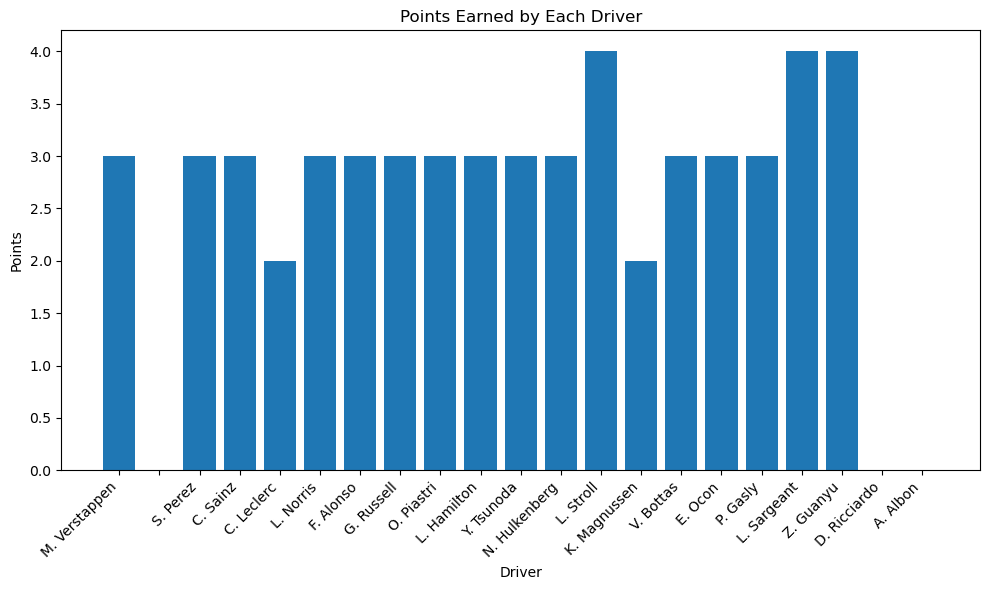

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define the table data
data =data = [
    ['1', 'M. Verstappen', '1', '53', '', '1:54\'23.566', '', '161.271', '3', '26', '', 'Red Bull', 'Red Bull'],
    ['', '', '', '', '', '', '', '', '', '', '', 'Red Bull Racing', ''],
    ['2', 'S. Perez', '11', '53', '', '+12.535', '12.535', '160.977', '3', '18', '', 'Red Bull', 'Red Bull'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'36.101', '', ''],
    ['3', 'C. Sainz', '55', '53', '', '+20.866', '8.331', '160.782', '3', '15', '', 'Ferrari', 'Ferrari'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'44.432', '', ''],
    ['4', 'C. Leclerc', '16', '53', '', '+26.522', '5.656', '160.650', '2', '12', '', 'Ferrari', 'Ferrari'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'50.088', '', ''],
    ['5', 'L. Norris', '4', '53', '', '+29.700', '3.178', '160.576', '3', '10', '', 'McLaren', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'53.266', '', ''],
    ['6', 'F. Alonso', '14', '53', '', '+44.272', '14.572', '160.237', '3', '8', '', 'Aston Martin', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '', '1:55\'07.838', '', ''],
    ['7', 'G. Russell', '63', '53', '', '+45.951', '1.679', '160.198', '3', '6', '', 'Mercedes', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '', '1:55\'09.517', '', ''],
    ['8', 'O. Piastri', '81', '53', '', '+47.525', '1.574', '160.162', '3', '4', '', 'McLaren', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '', '1:55\'11.091', '', ''],
    ['9', 'L. Hamilton', '44', '53', '', '+48.626', '1.101', '160.136', '3', '2', '', 'Mercedes', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '', '1:55\'12.192', '', ''],
    ['10', 'Y. Tsunoda', '22', '52', '', '+1 Lap', '1 Lap', '158.188', '3', '1', '', 'RB', 'Red Bull'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'25.168', '', ''],
    ['11', 'N. Hulkenberg', '27', '52', '', '+1 Lap', '5.566', '158.060', '3', '', '', 'Haas', 'Ferrari'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'30.734', '', ''],
    ['12', 'L. Stroll', '18', '52', '', '+1 Lap', '4.065', '157.966', '4', '', '', 'Aston Martin', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '','1:54\'34.799', '', ''],
    ['13', 'K. Magnussen', '20', '52', '', '+1 Lap', '6.686', '157.813', '2', '', '', 'Haas', 'Ferrari'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'41.485', '', ''],
    ['14', 'V. Bottas', '77', '52', '', '+1 Lap', '0.974', '157.791', '3', '', '', 'Sauber', 'Ferrari'],
    ['', '', '', '', '', '', '', '', '', '', '1:54\'42.459', '', ''],
    ['15', 'E. Ocon', '31', '52', '', '+1 Lap', '22.259', '157.282', '3', '', '', 'Alpine', 'Renault'],
    ['', '', '', '', '', '', '', '', '', '', '1:55\'04.718', '', ''],
    ['16', 'P. Gasly', '10', '52', '', '+1 Lap', '13.914', '156.966', '3', '', '', 'Alpine', 'Renault'],
    ['', '', '', '', '', '', '', '', '', '', '1:55\'18.632', '', ''],
    ['17', 'L. Sargeant', '2', '52', '', '+1 Lap', '17.699', '156.565', '4', '', '', 'Williams', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '', '1:55\'36.331', '', ''],
    ['dnf', 'Z. Guanyu', '24', '12', '', '+41 Laps', '40 Laps', '84.129', '4', '', 'Gearbox', 'Sauber', 'Ferrari'],
    ['', '', '', '', '', '', '', '', '', '', '49\'29.022', '', ''],
    ['dnf', 'D. Ricciardo', '3', '0', '', '', '', '', '', '', 'Collision', 'RB', 'Red Bull'],
    ['', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['dnf', 'A. Albon', '23', '0', '', '', '', '', '', '', 'Collision', 'Williams', 'Mercedes'],
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
]

     
# Define column names
columns = ['CLA', 'DRIVER', '#', 'LAPS' ,'','TIME INTERVAL', 'KM/H', 'PITS', 'POINTS', '#', 'RETIREMENT', 'CHASSIS', 'ENGINE']

# Convert data to DataFrame
df = pd.DataFrame(data, columns=columns)
tabular_data = tabulate(df, headers='keys', tablefmt='grid')
print(tabular_data)
# Remove empty rows
df = df.dropna(how='all')

# Perform basic analysis
basic_analysis = df.describe(include='all')

# Save basic analysis to text file
basic_analysis_filename = "basic_analysis.txt"
with open(basic_analysis_filename, 'w') as file:
    file.write(str(basic_analysis))


# Print confirmation message
print("Basic analysis saved to:", basic_analysis_filename)


df['POINTS'].replace('', 0, inplace=True)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['DRIVER'], df['POINTS'].astype(int))
plt.xlabel('Driver')
plt.ylabel('Points')
plt.title('Points Earned by Each Driver')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
bar_graph_filename = 'Driver_list_points_acheived.jpg'
plt.savefig(bar_graph_filename)
plt.savefig('Driver_list_points_acheived.pdf')
plt.show()




formula1 car winner governed by international oragnisation
+--+--------------+-------------+------------------+----------------------------+------+-------------+--+
|  | Grand Prix   | Date        | Winner           | Car                        | Laps | Time        |  |
+--+--------------+-------------+------------------+----------------------------+------+-------------+--+
|  | Bahrain      | 02 Mar 2024 | MaxVerstappenVER | Red Bull Racing Honda RBPT | 57   | 1:31:44.742 |  |
+--+--------------+-------------+------------------+----------------------------+------+-------------+--+
|  | Saudi Arabia | 09 Mar 2024 | MaxVerstappenVER | Red Bull Racing Honda RBPT | 50   | 1:20:43.273 |  |
+--+--------------+-------------+------------------+----------------------------+------+-------------+--+
|  | Australia    | 24 Mar 2024 | CarlosSainzSAI   | Ferrari                    | 58   | 1:20:26.843 |  |
+--+--------------+-------------+------------------+----------------------------+------+-----

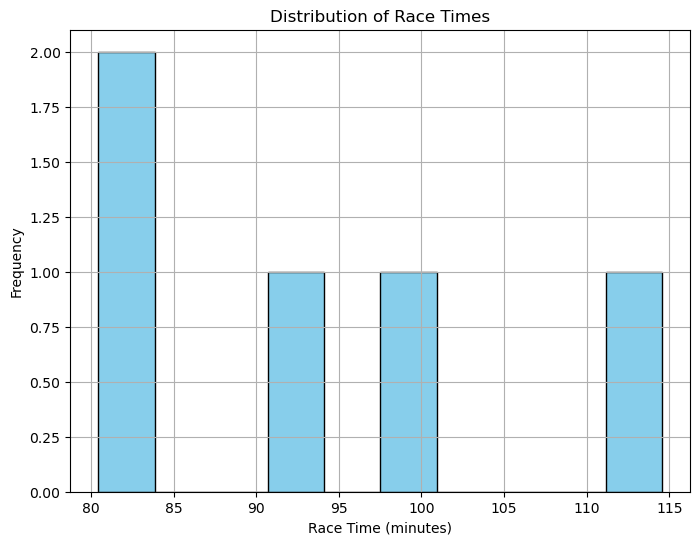

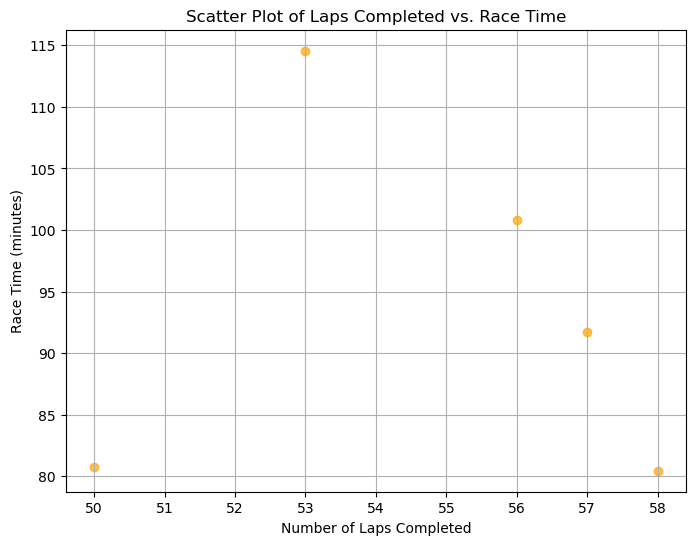

In [33]:
import requests
import json
import xml.etree.ElementTree as ET
import pandas as pd
from bs4 import BeautifulSoup
from tabulate import tabulate

# URL of the Formula 1 results page
url = 'https://www.formula1.com/en/results.html'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table with class="resultsarchive-table"
    table = soup.find('table', class_='resultsarchive-table')
    
    # Check if the table is found
    if table:
        # Extract the rows of the table
        rows = table.find_all('tr')
        
        # Initialize a list to store the data
        data = []
        
        # Loop through each row and extract the text content of each cell
        for row in rows:
            cells = row.find_all(['th', 'td'])
            row_data = [cell.get_text(strip=True) for cell in cells]
            data.append(row_data)
        
        # Print data in tabular format
        print("formula1 car winner governed by international oragnisation")
        print(tabulate(data,  tablefmt='grid'))
        
        # Save data to JSON file
        with open('result_of_formula1_car2024.json', 'w') as json_file:
            json.dump(data, json_file, indent=4)
        
        # Create XML structure
        root = ET.Element("Formula1Results")
        for row_data in data:
            row_element = ET.SubElement(root, "Row")
            for index, cell_data in enumerate(row_data):
                cell_element = ET.SubElement(row_element, f"Cell{index}")
                cell_element.text = cell_data
        
        # Save data to XML file
        tree = ET.ElementTree(root)
        tree.write("result_of_formula1_car2024.xml")
        
        print("\nData saved successfully in JSON and XML formats.")
    else:
        print('Table not found.')
else:
    print('Failed to retrieve webpage. Status code:', response.status_code)
race_times = [91.744, 80.723, 80.449, 114.566, 100.837]  # Race times in minutes
laps_completed = [57, 50, 58, 53, 56]  # Number of laps completed

# Create Histogram
plt.figure(figsize=(8, 6))
plt.hist(race_times, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Race Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Race Times')
plt.grid(True)
plt.show()

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(laps_completed, race_times, color='orange', alpha=0.7)
plt.xlabel('Number of Laps Completed')
plt.ylabel('Race Time (minutes)')
plt.title('Scatter Plot of Laps Completed vs. Race Time')
plt.grid(True)
plt.show()


In [34]:
import requests
from bs4 import BeautifulSoup
import json
import xml.etree.ElementTree as ET
from tabulate import tabulate

# Send a GET request to the URL
url = "https://www.espn.com/racing/results"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table with class "tablehead"
    table = soup.find("table", class_="tablehead")
    
    if table:
        # Extract the headers
        headers = [th.text.strip() for th in table.find_all("th")]

        # Extract the rows
        rows = []
        for tr in table.find_all("tr"):
            row = [td.text.strip() for td in tr.find_all("td")]
            if row:
                rows.append(row)

        # Display the result in tabular format
        print(tabulate(rows, headers=headers))

        # Store the data in JSON format
        data_json = {"headers": headers, "data": rows}
        with open("result_espn.json", "w") as json_file:
            json.dump(data_json, json_file, indent=4)
        print("Data stored in JSON format.")

        # Store the data in XML format
        root = ET.Element("data")
        for row in rows:
            entry = ET.SubElement(root, "entry")
            for i, header in enumerate(headers):
                ET.SubElement(entry, header).text = row[i]
        tree = ET.ElementTree(root)
        tree.write("result_espn.xml")
        print("Data stored in XML format.")
    else:
        print("Table with class 'tablehead' not found.")
else:
    print("Failed to retrieve webpage. Status code:", response.status_code)


------------  -------------------------------------------------------------------  ----------------------  ----------------------
2024 Results
DATE          RACE                                                                 WINNER                  POLE WINNER
Sat, Feb 3    Clash at The ColiseumLos Angeles Memorial Coliseum                   Denny HamlinToyota      Denny HamlinToyota
Thu, Feb 15   Duel #1Daytona International Speedway                                Tyler ReddickToyota     Joey LoganoFord
Thu, Feb 15   Duel #2Daytona International Speedway                                Christopher BellToyota  Michael McDowellFord
Sun, Feb 18   Daytona 500Daytona International Speedway                            William ByronChevrolet  Joey LoganoFord
Sun, Feb 25   NASCAR Cup Series at AtlantaAtlanta Motor Speedway                   Daniel SuarezChevrolet  Michael McDowellFord
Sun, Mar 3    NASCAR Cup Series at Las VegasLas Vegas Motor Speedway               Kyle LarsonChevrolet    Joe

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
print(os.getcwd())


C:\Users\Tester


In [6]:
!pip freeze > requirements.txt


In [7]:
pip install pipreqs


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/798.3 kB 2.0 MB/s eta 0:00:01
   ----- ---------------------------------- 112.6/798.3 kB 2.2 MB/s eta 0:00:01
   ------- -------------------------------- 143.4/798.3 kB 1.2 MB/s eta 0:00:01
   ---------- ----------------------------- 204.8/798.3 kB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 256.0/798.3 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 256.0/798.3 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 337.9/798.3 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 409.6/798.3 kB 1.2 MB/s eta 0:00:01
   ---------------------- ----------------- 450.6/798.3 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 532.5/798.3 kB 1.2 MB/s eta 0:00:01
   -------------------------

In [10]:
pipreqs "C:\\Users\\Tester"


SyntaxError: invalid syntax (2547767277.py, line 1)

In [4]:
%pwd


'C:\\Users\\Tester'